# ggplot2

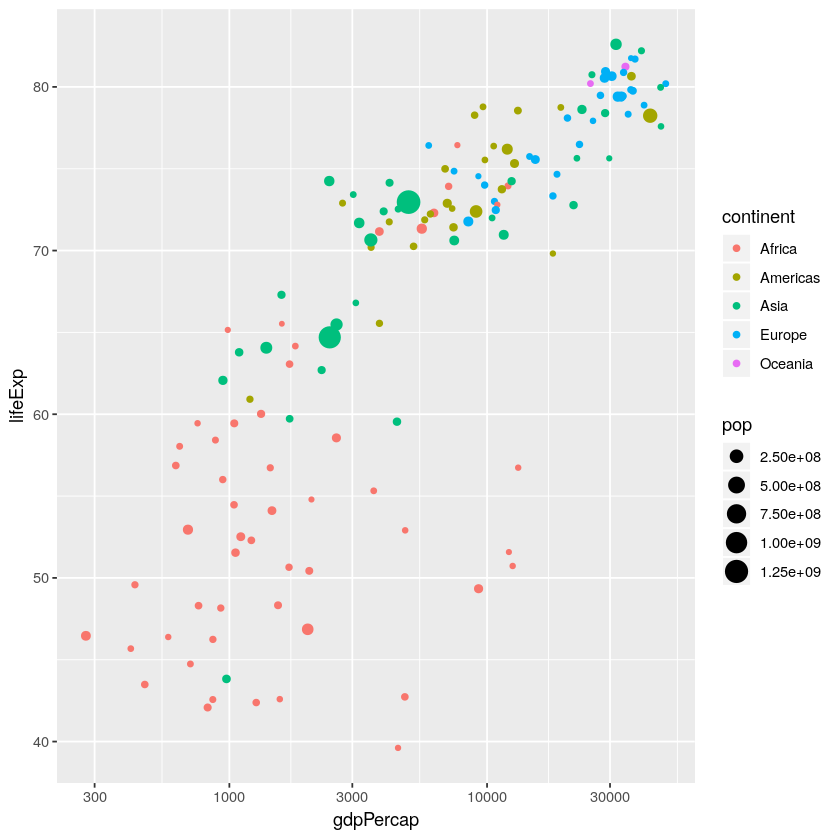

In [1]:
library(tidyverse)
library(gapminder)
library(dplyr, warn.conflicts = FALSE)
data <- gapminder %>% filter(year==2007)
ggplot(data, aes(x=gdpPercap, y = lifeExp, color=continent,
                                             size=pop)) +
    scale_x_log10() +
    geom_point()


In [2]:
ggplot(gapminder, aes(x=gdpPercap, y = lifeExp, color=continent,
                                             size=pop)) +
    scale_x_log10() +
    geom_point() +
    facet_wrap(~year)

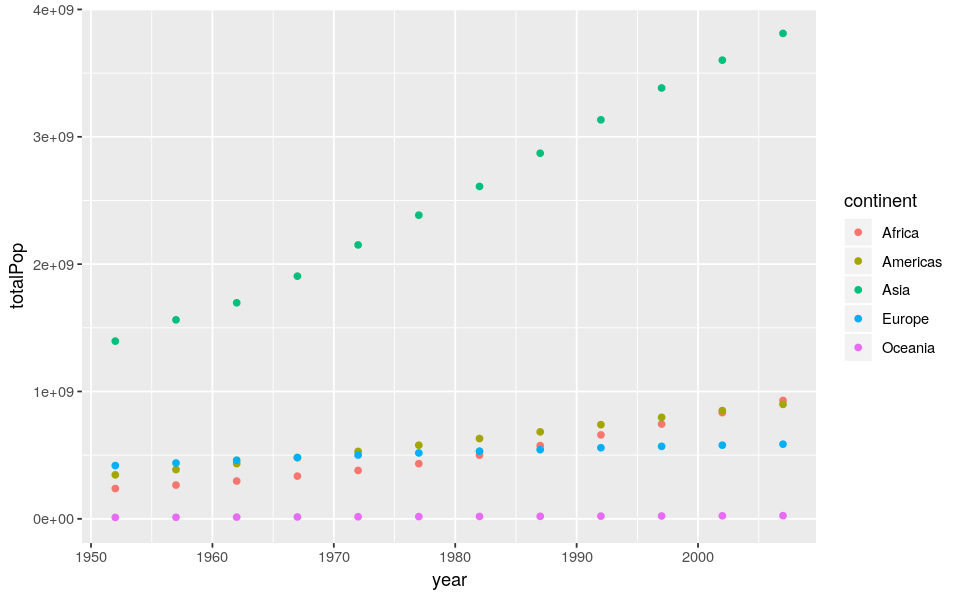

In [3]:
options(repr.plot.width = 8, repr.plot.height  = 5 )
by_year <- gapminder %>% group_by(year, continent) %>% summarize(totalPop=sum(as.numeric(pop)))
ggplot(by_year, aes(x=year, y=totalPop, color=continent)) +
    geom_point() +
    expand_limits(y = 0)

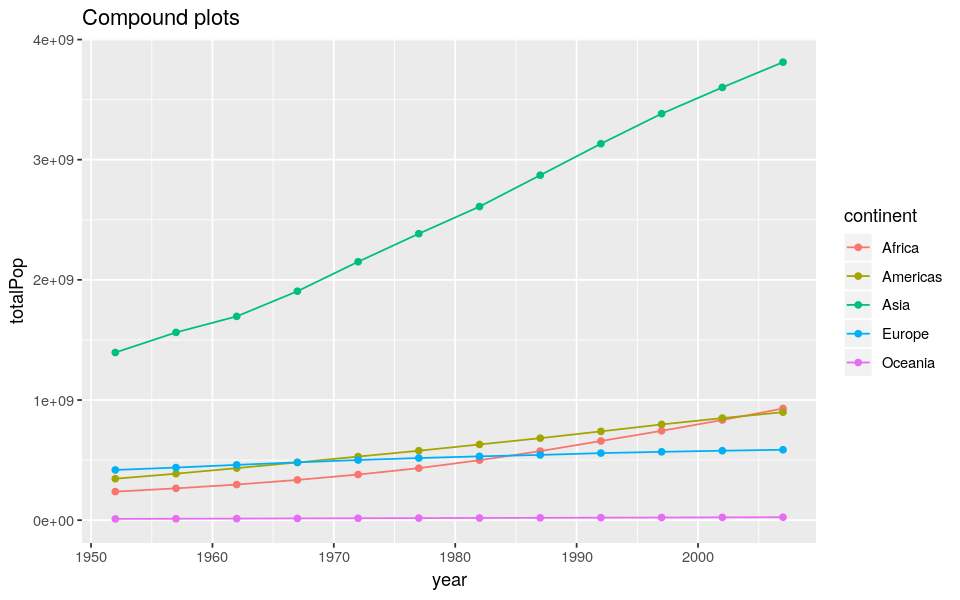

In [4]:
ggplot(by_year, aes(x=year, y=totalPop, color=continent)) +
    geom_line() +
    geom_point() +
    expand_limits(y = 0) + 
    ggtitle("Compound plots")

# Simple plots

png 
  2

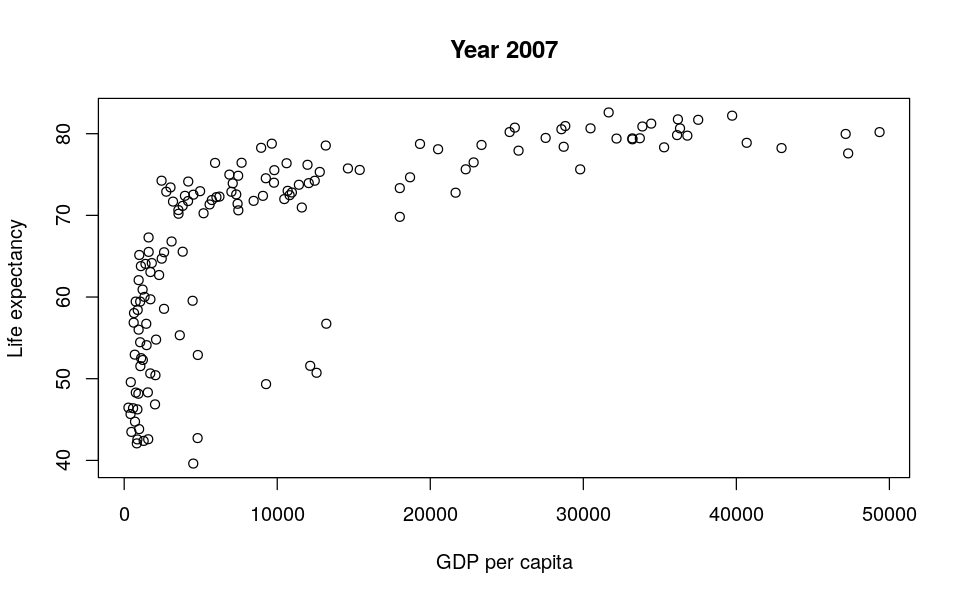

In [5]:
library(gapminder)
library(dplyr, warn.conflicts = FALSE)
data <- gapminder %>% filter(year==2007)
plot(data$gdpPercap, data$lifeExp, xlab="GDP per capita", ylab="Life expectancy", main="Year 2007")

# Save to jpeg
jpeg("outPlotTest.jpeg")
plot(data$gdpPercap, data$lifeExp, xlab="GDP per capita", ylab="Life expectancy", main="Year 2007")
dev.off()

In [6]:
hist(gapminder$gdpPercap)

In [21]:
library(datasets)
data(iris)
iris$Flower <- 1:nrow(iris)
iris.wide <- iris %>%
  gather(key, value,-Flower, -Species) %>%
  separate(key, c("Part", "Measure"), "\\.") %>%
  spread(Measure, value)

ggplot(iris.wide, aes(x = Length, y = Width, color = Part)) +
  geom_jitter() +
  facet_grid(. ~ Species)

## Aesthetics

Aesthetics or attributes modify the visual properties of the plot. We can map a variable into an aesthetics or define a constant property.

Typical Aesthetics:
- x : X axis position
- y : Y axis position
- colour : Colour of dots, outlines of other shapes
- group: inherits from colour (can be manually set to 1)
- fill : Fill color
- size : Diameter of points, thickness of lines
- alpha : Transparancy
- linetype : Line dash pattern
- labels : Text on a plot or axes
- Shape


We usually define aestetics inside the ggplot definition and attributes on the geom one.

# Visualls

If the discrete pallete has too few elements:

```r
scale_fill_brewer(palette="Reds")
#Warning message: n too large, allowed maximum for palette Reds is 9
blues <- brewer.pal(9, "Blues")
blue_range <- colorRampPalette(blues)
scale_fill_manual(values=blue_range(11))
```

## Multiple dataset example

In [ ]:
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_rect(data = recess,
         aes(xmin = begin, xmax = end , ymin = -Inf, ymax = +Inf),
         inherit.aes = FALSE, fill = "red", alpha = 0.2) +
  geom_line()

## qplot

In [ ]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point()

# Using qplot:
qplot(wt, mpg, data = mtcars, geom="jitter", color=varMap, size=I(2))  # Almost all arguments are optional

## Smoothing

```r
# Will do it's best
geom_point()

# Other options
geom_smoot(method="lm", se=F)
```

If size < 1000 the default methos is `loess`, witch is basically an sliding window average. To controll the size of the windows we can set the `span` var.

## Zomming

```r
# More like dropping points outside the limits
p +  scale_x_continuous(limits = c(3, 6), expand = c(0, 0))

# Like actually zooming
p + coord_cartesian(xlim=c(3, 6))

# Somitimes scale an axis is enought 
base.plot + coord_equal(ratio=1)
```